In [1]:
%matplotlib inline
import mne
import os
import matplotlib.pyplot as plt
import numpy as np
from mne.event import define_target_events
from scipy.stats import ttest_ind
from time import time
from mne.preprocessing import ICA
from mne.datasets import sample
#from mne.channels import find_ch_connectivity, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test
from scipy import io as spio
import scipy.stats as spstats
import math
import seaborn as sns

###  Load Data

In [2]:
rival = spio.loadmat('data/rival_ind.mat')
replay = spio.loadmat('data/replay_smooth_ind.mat')

In [8]:
emixed_BR = [[] for i in range(20)]; # list for BR condition
edominant_BR = [[] for i in range(20)];

# S 3: Mixed percept , S 1: Green, S 2: Red (S1 and S2, Dominant)

Lag1_BR = np.array([]);
Lag2_BR = np.array([]);

# FOR BR CONDITION
for ss in range(1,21):
    rival_sub = rival['rival_ind'][0][ss-1][0]
    # FOR BR CONDITION
    for sc in rival_sub:
    # looping variables
        #ss = 1
        #sc = 1
        sub  = 'S' + str(ss).zfill(2)
        scan = 'scan' + str(sc)
        # read file
        fname = 'data/EEGlabDATA/' + sub + '_' + scan +'_EEG.set'
        raw = mne.io.read_raw_eeglab(fname)
        raw.info['bads'] = ['ECG']
        #raw.save('MNE_practice/EEGlabDATA/' + sub + '_' + scan +'_EEG.fif')
        raw.set_eeg_reference('average', projection=True)
        # epoch
        event_id = {"S  3":1, "S  1":2, "S  2":2}
        events = mne.events_from_annotations(raw, event_id)[0]

        # separate events
        tmax1 = 0.5
        tmin1 = -1.0

        tmax2 = 0.5
        tmin2 = -1.0

        sfreq = raw.info["sfreq"] # sample rate = 250 Hz
        reference_id, target_id = 1, 2
        new_events1, lag1 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin1, tmax=tmax1, new_id=1)

        epochs_mixed = mne.Epochs(raw, events=new_events1, tmax=tmax1 , tmin=tmin1, baseline = None,
                            event_id={"S  3":1})

        reference_id, target_id = 2, 1
        new_events2, lag2 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin2, tmax=tmax2, new_id=2)

        epochs_dominant = mne.Epochs(raw, events=new_events2, tmax=tmax2 ,tmin=tmin2, baseline = None,
                            event_id={"S  1":2, "S  2":2})

        # store outputs
        emixed_BR[ss-1].append(epochs_mixed)
        edominant_BR[ss-1].append(epochs_dominant)
        Lag1_BR = np.append(Lag1_BR, lag1)
        Lag2_BR = np.append(Lag2_BR, lag2)
        
        

emixed_RPL = [[] for i in range(20)]; # list for Rpl condition
edominant_RPL = [[] for i in range(20)];
Lag1_RPL = np.array([]);
Lag2_RPL = np.array([]);


# FOR RPL CONDITION
for ss in range(1,21):
    replay_sub = replay['replay_smooth_ind'][0][ss-1][0]
    for sc in replay_sub:
    # looping variables
        #ss = 1
        #sc = 1
        sub  = 'S' + str(ss).zfill(2)
        scan = 'scan' + str(sc)
        # read file
        fname = 'data/EEGlabDATA/' + sub + '_' + scan +'_EEG.set'
        raw = mne.io.read_raw_eeglab(fname)
        raw.info['bads'] = ['ECG']
        #raw.save('MNE_practice/EEGlabDATA/' + sub + '_' + scan +'_EEG.fif')
        raw.set_eeg_reference('average', projection=True)

        # epoch
        event_id = {"S  3":1, "S  1":2, "S  2":2}
        events = mne.events_from_annotations(raw, event_id)[0]

        # separate events
        tmax1 = 0.5
        tmin1 = -1.0

        tmax2 = 0.5
        tmin2 = -1.0

        sfreq = raw.info["sfreq"] # sample rate = 250 Hz
        reference_id, target_id = 1, 2
        new_events1, lag1 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin1, tmax=tmax1, new_id=1)

        epochs_mixed = mne.Epochs(raw, events=new_events1, tmax=tmax1 , tmin=tmin1, baseline = None,
                            event_id={"S  3":1}, verbose=False)

        reference_id, target_id = 2, 1
        new_events2, lag2 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin2, tmax=tmax2, new_id=2)

        epochs_dominant = mne.Epochs(raw, events=new_events2, tmax=tmax2 ,tmin=tmin2, baseline = None,
                            event_id={"S  1":2, "S  2":2},verbose=False)

        # store outputs
        emixed_RPL[ss-1].append(epochs_mixed)
        edominant_RPL[ss-1].append(epochs_dominant)
        Lag1_RPL = np.append(Lag1_RPL, lag1)
        Lag2_RPL = np.append(Lag2_RPL, lag2)

/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
84 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
81 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
86 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
78 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
84 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
76 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
78 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
41 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
45 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
54 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
32 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
39 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
29 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
26 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
33 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
54 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
74 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
39 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
29 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
28 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
44 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
21 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
41 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
34 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
45 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
34 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
45 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
32 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
23 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
42 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
26 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
34 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
35 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
23 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
38 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
28 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
34 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
32 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
42 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
28 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
41 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
41 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
55 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
42 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
52 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
41 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
49 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
35 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
49 matching events found


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
25 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
23 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
33 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
17 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
29 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
19 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
38 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
22 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
29 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
23 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
32 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
63 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
77 matching events found
No baseline correction applied


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
77 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
71 matching events found


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
81 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
67 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
54 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
64 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
75 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
83 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
61 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
68 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
63 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
33 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
34 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
64 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
65 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
57 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
116 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
128 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
108 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
115 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
108 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
76 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
49 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
54 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
54 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
38 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
64 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
65 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
68 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
40 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
28 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
29 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
52 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
61 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
69 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
52 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
63 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
52 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
55 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
68 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
64 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
73 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
56 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
61 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
53 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
66 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
44 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
61 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
48 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
53 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
34 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
57 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
32 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
35 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
39 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
43 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
38 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
51 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
64 matching events found
No baseline correction applied


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
73 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
53 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
38 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
34 matching events found
No baseline correction applied


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
41 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
75 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
103 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
63 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
82 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/355473

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
74 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
75 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
35 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
26 matching events found
No baseline correction applied


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
40 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
19 matching events found
No baseline correction applied


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
Not setting metadata
Not setting metadata
19 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
27 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:21: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/355473

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/355473

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/355473

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/355473

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/3554738325.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


### Concatenating MNE Epochs (for all sessions) and Saving ERPs

In [9]:
all_dominant_BR = [[] for i in range(20)]
all_dominant_RPL = [[] for i in range(20)]
all_mixed_BR = [[] for i in range(20)]
all_mixed_RPL = [[] for i in range(20)]

for i in range(20):
    all_dominant_BR[i] = mne.concatenate_epochs(edominant_BR[i])
    all_dominant_RPL[i] = mne.concatenate_epochs(edominant_RPL[i])
    all_mixed_BR[i] = mne.concatenate_epochs(emixed_BR[i])
    all_mixed_RPL[i] = mne.concatenate_epochs(emixed_RPL[i])
    

erp_dominant_BR = []
erp_dominant_RPL = []
erp_mixed_BR = []
erp_mixed_RPL = []

for i in range(20):
    erp_dominant_BR.append(all_dominant_BR[i].apply_baseline((-0.5,-0.4)).average())
    erp_dominant_RPL.append(all_dominant_RPL[i].apply_baseline((-0.5,-0.4)).average())
    erp_mixed_BR.append(all_mixed_BR[i].apply_baseline((-0.5,-0.4)).average())
    erp_mixed_RPL.append(all_mixed_RPL[i].apply_baseline((-0.5,-0.4)).average())
    
    
    
import pickle
dict1 = {'erp_dominant_BR':erp_dominant_BR, 
        'erp_dominant_RPL':erp_dominant_RPL,
        'erp_mixed_BR': erp_mixed_BR,
        'erp_mixed_RPL': erp_mixed_RPL}

pickle.dump(dict1 , open( "all_erps.p", "wb" ) )

Loading data for 85 events and 376 original time points ...
0 bad epochs dropped
Loading data for 86 events and 376 original time points ...
0 bad epochs dropped
Loading data for 95 events and 376 original time points ...
0 bad epochs dropped
Loading data for 94 events and 376 original time points ...
0 bad epochs dropped
Loading data for 84 events and 376 original time points ...
0 bad epochs dropped
Loading data for 78 events and 376 original time points ...
0 bad epochs dropped
Loading data for 85 events and 376 original time points ...
Loading data for 86 events and 376 original time points ...
Loading data for 95 events and 376 original time points ...
Loading data for 94 events and 376 original time points ...
Loading data for 84 events and 376 original time points ...
Loading data for 78 events and 376 original time points ...
Not setting metadata
Not setting metadata
522 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad 

Loading data for 38 events and 376 original time points ...
Not setting metadata
Not setting metadata
194 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Loading data for 14 events and 376 original time points ...
0 bad epochs dropped
Loading data for 18 events and 376 original time points ...
0 bad epochs dropped
Loading data for 26 events and 376 original time points ...
0 bad epochs dropped
Loading data for 35 events and 376 original time points ...
0 bad epochs dropped
Loading data for 23 events and 376 original time points ...
0 bad epochs dropped
Loading data for 14 events and 376 original time points ...
Loading data for 18 events and 376 original time points ...
Loading data for 26 events and 376 original time points ...
Loading data for 35 events and 376 original time points ...
Loading data for 23 events and 376 original time points ...
Not setting metadata
Not setting metadata
116 matching events foun

Not setting metadata
Not setting metadata
104 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Loading data for 77 events and 376 original time points ...
0 bad epochs dropped
Loading data for 80 events and 376 original time points ...
0 bad epochs dropped
Loading data for 81 events and 376 original time points ...
0 bad epochs dropped
Loading data for 67 events and 376 original time points ...
0 bad epochs dropped
Loading data for 64 events and 376 original time points ...
0 bad epochs dropped
Loading data for 77 events and 376 original time points ...
Loading data for 80 events and 376 original time points ...
Loading data for 81 events and 376 original time points ...
Loading data for 67 events and 376 original time points ...
Loading data for 64 events and 376 original time points ...
Not setting metadata
Not setting metadata
369 matching events found
No baseline correction applied
Created an SSP operator (su

Loading data for 40 events and 376 original time points ...
Loading data for 28 events and 376 original time points ...
Loading data for 37 events and 376 original time points ...
Not setting metadata
Not setting metadata
228 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Loading data for 61 events and 376 original time points ...
0 bad epochs dropped
Loading data for 69 events and 376 original time points ...
0 bad epochs dropped
Loading data for 63 events and 376 original time points ...
0 bad epochs dropped
Loading data for 52 events and 376 original time points ...
0 bad epochs dropped
Loading data for 68 events and 376 original time points ...
0 bad epochs dropped
Loading data for 61 events and 376 original time points ...
Loading data for 69 events and 376 original time points ...
Loading data for 63 events and 376 original time points ...
Loading data for 52 events and 376 original time points ...
Loadin

Loading data for 38 events and 376 original time points ...
Loading data for 41 events and 376 original time points ...
Not setting metadata
Not setting metadata
270 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Loading data for 64 events and 376 original time points ...
0 bad epochs dropped
Loading data for 53 events and 376 original time points ...
0 bad epochs dropped
Loading data for 59 events and 376 original time points ...
0 bad epochs dropped
Loading data for 37 events and 376 original time points ...
0 bad epochs dropped
Loading data for 34 events and 376 original time points ...
0 bad epochs dropped
Loading data for 64 events and 376 original time points ...
Loading data for 53 events and 376 original time points ...
Loading data for 59 events and 376 original time points ...
Loading data for 37 events and 376 original time points ...
Loading data for 34 events and 376 original time points ...
Not se

### Loading ERPs for Stats

In [10]:
import pickle
with open('all_erps.p','rb') as ff:
    dict1 = pickle.load(ff)
erp_dominant_BR = dict1['erp_dominant_BR']
erp_dominant_RPL = dict1['erp_dominant_RPL']
erp_mixed_BR = dict1['erp_mixed_BR']
erp_mixed_RPL = dict1['erp_mixed_RPL']

### Grand Averaged ERPs

In [11]:
gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
gave_dominant_RPL = mne.grand_average(erp_dominant_RPL,drop_bads=True)
gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
gave_mixed_RPL = mne.grand_average(erp_mixed_RPL,drop_bads=True)

Interpolating bad channels
    Automatic origin fit: head of radius 8351.1 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8351.1 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (435.7, 1009.5) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)


Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8353.2 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8653.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8871.8 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8353.2 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (-142.3, 285.7) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8653.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (-95.3, 1421.4) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjz

    Automatic origin fit: head of radius 8646.9 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8426.3 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8646.9 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (298.5, 1055.7) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8426.3 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (-135.9, 0.9) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh0

Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8234.6 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8494.8 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8234.6 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (289.0, 148.5) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8494.8 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (269.6, -296.0) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)


    Automatic origin fit: head of radius 8879.7 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8053.5 mm
Computing interpolation matrix from 63 sensor positions


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8879.7 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (-360.2, 1588.7) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr900

Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8517.9 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8558.9 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8212.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Identifying common channels ...


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (8517.9 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: (X, Y) fit (23.2, 2417.4) more than 20 mm from head frame origin
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:1: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_BR = mne.grand_average(erp_dominant_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018

Identifying common channels ...
Interpolating bad channels
    Automatic origin fit: head of radius 8351.1 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8353.2 mm
Computing interpolation matrix from 63 sensor positions


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:2: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_RPL = mne.grand_average(erp_dominant_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:2: RuntimeWarning: Estimated head size (8558.9 mm) exceeded 99th percentile for adult head size
  gave_dominant_RPL = mne.grand_average(erp_dominant_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:2: RuntimeWarning: (X, Y) fit (236.6, 1762.3) more than 20 mm from head frame origin
  gave_dominant_RPL = mne.grand_average(erp_dominant_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:2: RuntimeWarning: Estimated head size (8212.0 mm) exceeded 99th percentile for adult head size
  gave_dominant_RPL = mne.grand_average(erp_dominant_RPL,drop_bads=True)
/var/folders/9j/_8x

Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8653.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8871.8 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8646.9 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8426.3 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8653.0 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: (X, Y) fit (-95.3, 1421.4) more than 20 mm from head frame origin
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8871.8 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: (X, Y) fit (289.2, 33.8) more than 20 mm from head frame origin
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374

    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8234.6 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8494.8 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8879.7 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8234.6 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: (X, Y) fit (289.0, 148.5) more than 20 mm from head frame origin
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8494.8 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipy

Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8053.5 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8053.5 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: (X, Y) fit (-43.0, 1848.0) more than 20 mm from head frame origin
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ip

    Automatic origin fit: head of radius 8517.9 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 1000.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 8558.9 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Interpolating bad channels


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8517.9 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: (X, Y) fit (23.2, 2417.4) more than 20 mm from head frame origin
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8558.9 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipy

    Automatic origin fit: head of radius 8212.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors
Identifying common channels ...


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: Estimated head size (8212.0 mm) exceeded 99th percentile for adult head size
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:3: RuntimeWarning: (X, Y) fit (298.3, 108.7) more than 20 mm from head frame origin
  gave_mixed_BR = mne.grand_average(erp_mixed_BR,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:4: RuntimeWarning: Estimated head size (8351.1 mm) exceeded 99th percentile for adult head size
  gave_mixed_RPL = mne.grand_average(erp_mixed_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:4: RuntimeWarning: (X, Y) fit (435.7, 1009.5) more than 20 mm from head frame origin
  gave_mixed_RPL = mne.grand_average(erp_mixed_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_

Identifying common channels ...


/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:4: RuntimeWarning: Estimated head size (8558.9 mm) exceeded 99th percentile for adult head size
  gave_mixed_RPL = mne.grand_average(erp_mixed_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:4: RuntimeWarning: (X, Y) fit (236.6, 1762.3) more than 20 mm from head frame origin
  gave_mixed_RPL = mne.grand_average(erp_mixed_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:4: RuntimeWarning: Estimated head size (8212.0 mm) exceeded 99th percentile for adult head size
  gave_mixed_RPL = mne.grand_average(erp_mixed_RPL,drop_bads=True)
/var/folders/9j/_8xflyr90018qhclwvwhjzh00000gp/T/ipykernel_26374/1595779308.py:4: RuntimeWarning: (X, Y) fit (298.3, 108.7) more than 20 mm from head frame origin
  gave_mixed_RPL = mne.grand_average(erp_mixed_RPL,drop_bads=True)


### Visualizing ERPs for Dominant Percept

<Figure size 432x288 with 0 Axes>

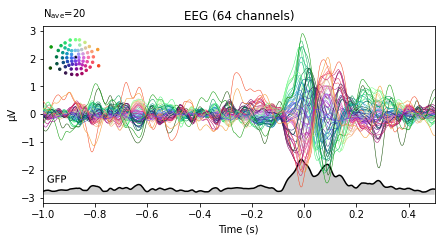

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

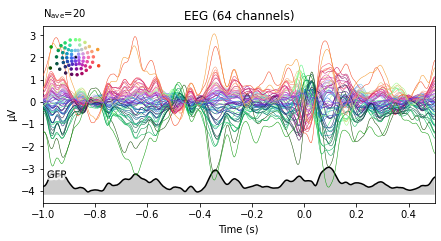

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure()
fig1 = gave_dominant_BR.plot(spatial_colors=True,gfp=True)
plt.tight_layout()
plt.figure()
fig2 = gave_dominant_RPL.plot(spatial_colors=True, gfp = True)
plt.tight_layout()


### Visualizing ERPs for Mixed Percept

<Figure size 432x288 with 0 Axes>

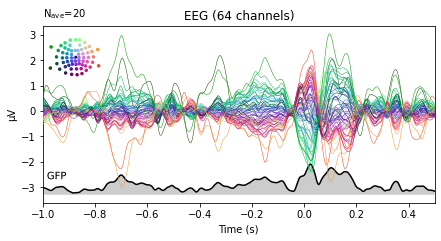

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

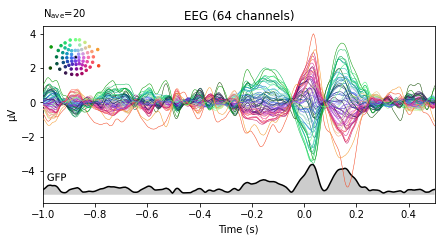

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure()
fig1 = gave_mixed_BR.plot(spatial_colors=True,gfp=True)
plt.tight_layout()
plt.figure()
fig2 = gave_mixed_RPL.plot(spatial_colors=True, gfp = True)
plt.tight_layout()

### Plotting GFP of Gave

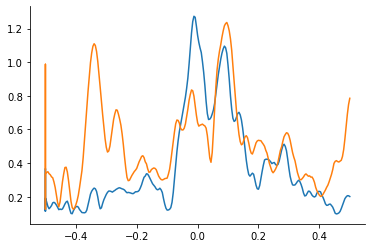

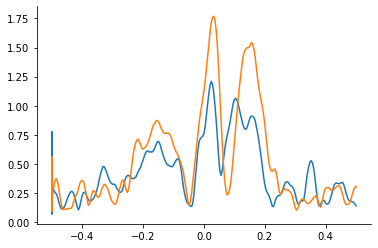

In [81]:
gave_gfp_dominant_BR = gave_dominant_BR.data.std(axis=0)
gave_gfp_dominant_RPL = gave_dominant_RPL.data.std(axis=0)
gave_gfp_mixed_BR = gave_mixed_BR.data.std(axis=0)
gave_gfp_mixed_RPL = gave_mixed_RPL.data.std(axis=0)
plt.figure()
t = gave_dominant_BR.times.clip(-0.5,0.5)
plt.plot(t,1e6*gave_gfp_dominant_BR)
plt.plot(t,1e6*gave_gfp_dominant_RPL)
sns.despine()
plt.figure()
plt.plot(t,1e6*gave_gfp_mixed_BR)
plt.plot(t,1e6*gave_gfp_mixed_RPL)
sns.despine()

### Checking Single Subject GFP Power

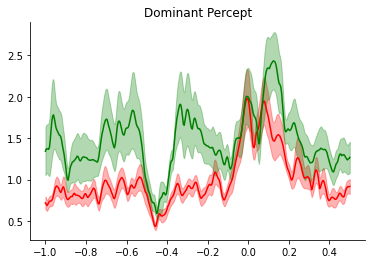

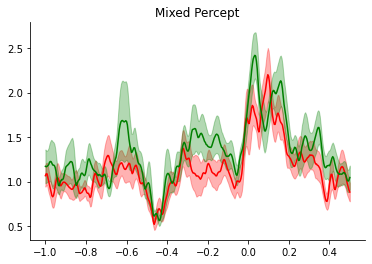

In [12]:
all_gfp_dominant_BR = 1e6*np.asanyarray([erp_dominant_BR[i].drop_channels(ch_names=erp_dominant_BR[i].info['bads']).data.std(axis=0) for i in range(20)])
all_gfp_dominant_RPL = 1e6*np.asanyarray([erp_dominant_RPL[i].drop_channels(ch_names=erp_dominant_RPL[i].info['bads']).data.std(axis=0) for i in range(20)])
all_gfp_mixed_BR = 1e6*np.asanyarray([erp_mixed_BR[i].drop_channels(ch_names=erp_mixed_BR[i].info['bads']).data.std(axis=0) for i in range(20)])
all_gfp_mixed_RPL = 1e6*np.asanyarray([erp_mixed_RPL[i].drop_channels(ch_names=erp_mixed_RPL[i].info['bads']).data.std(axis=0) for i in range(20)])

mu1,err1 = all_gfp_dominant_BR.mean(axis=0), all_gfp_dominant_BR.std(axis=0)/math.sqrt(20)
mu2,err2 = all_gfp_dominant_RPL.mean(axis=0), all_gfp_dominant_RPL.std(axis=0)/math.sqrt(20)
mu3,err3 = all_gfp_mixed_BR.mean(axis=0), all_gfp_mixed_BR.std(axis=0)/math.sqrt(20)
mu4,err4 = all_gfp_mixed_RPL.mean(axis=0), all_gfp_mixed_RPL.std(axis=0)/math.sqrt(20)

times = erp_dominant_BR[0].times

plt.figure()
plt.plot(times,mu1,color='r')
plt.fill_between(times,mu1-err1,mu1+err1,alpha=0.3,color='r')

plt.plot(times,mu2,color='g')
plt.fill_between(times,mu2-err2,mu2+err2,alpha=0.3,color='g')
plt.title('Dominant Percept')
sns.despine()

plt.savefig('dominant_ERPs.svg')

plt.figure()
plt.plot(times,mu3,color='r')
plt.fill_between(times,mu3-err3,mu3+err3,alpha=0.3,color='r')

plt.plot(times,mu4,color='g')
plt.fill_between(times,mu4-err4,mu4+err4,alpha=0.3,color='g')
plt.title('Mixed Percept')
sns.despine()

plt.savefig('mixed_ERPs.svg')

### Stats

#### Dominant Percept

In [13]:
times = erp_dominant_BR[0].times
tt = np.where(np.logical_and(times>=-0.5,times<=0))[0]


### Check Significant Time ranges for Dominant Percept
[F,c,p,H0] = mne.stats.permutation_cluster_1samp_test(all_gfp_dominant_BR[:,tt]-all_gfp_dominant_RPL[:,tt],out_type='mask')


for i in range(len(p)):
    if(p[i]<0.05):
        print('The following cluster is significantly different at p  = {}\n'.format(p[i]))
        print(times[tt[c[i]]])
        print('\n\n')

Using a threshold of 2.093024
stat_fun(H1): min=-3.618690 max=-0.015656
Running initial clustering
Found 6 clusters
Permuting 1023 times...


ImportError: FloatProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

#### Mixed Percept

In [84]:
times = erp_dominant_BR[0].times
tt = np.where(np.logical_and(times>=-0.5,times<=0))[0]


### Check Significant Time ranges for Dominant Percept
[F,c,p,H0] = mne.stats.permutation_cluster_1samp_test(all_gfp_mixed_BR[:,tt]-all_gfp_mixed_RPL[:,tt],out_type='mask')

for i in range(len(p)):
    if(p[i]<0.05):
        print('The following cluster is significantly different at p  = {}\n'.format(p[i]))
        print(times[tt[c[i]]])
        

Using a threshold of 2.093024
stat_fun(H1): min=-2.533427 max=1.037174
Running initial clustering
Found 1 clusters
Permuting 1023 times...


  0%|          |  : 0/1023 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


#### 2-way ANOVA

Main effect of source of perceptual transition:F-Val = 5.952025675073897, p-val = 0.02467615061812178
Main effect of perceptual types :F-Val = 0.009215065651100444, p-val = 0.9245297222730431
Interaction between perceptual type and transition: F-Val = 4.238010616812721, p-val = 0.05350662052014381


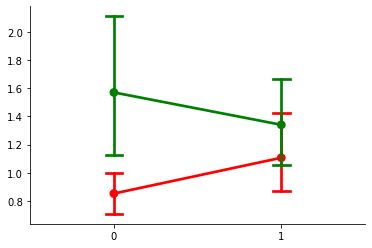

In [15]:
t = np.where(np.logical_and(times>=-0.4,times<=-0.2))[0]
BR_dom, RPL_dom, BR_mix, RPL_mix = np.nanmean(all_gfp_dominant_BR[:,t],axis=1), np.nanmean(all_gfp_dominant_RPL[:,t],axis=1), np.nanmean(all_gfp_mixed_BR[:,t],axis=1),np.nanmean(all_gfp_mixed_RPL[:,t],axis=1)

Fval,pval = mne.stats.f_mway_rm(np.vstack([BR_dom,BR_mix,RPL_dom,RPL_mix]).T,factor_levels=[2,2],effects='A*B')

print('Main effect of source of perceptual transition:F-Val = {}, p-val = {}'.format(Fval[0],pval[0]))
print('Main effect of perceptual types :F-Val = {}, p-val = {}'.format(Fval[1],pval[1]))
print('Interaction between perceptual type and transition: F-Val = {}, p-val = {}'.format(Fval[2],pval[2]))


sns.pointplot(data= np.vstack([BR_dom,BR_mix]).T,color = 'r',capsize=0.1,ci=95)
sns.pointplot(data= np.vstack([RPL_dom,RPL_mix]).T,color = 'g',capsize=0.1,ci=95)
sns.despine()
plt.savefig('interaction.svg')

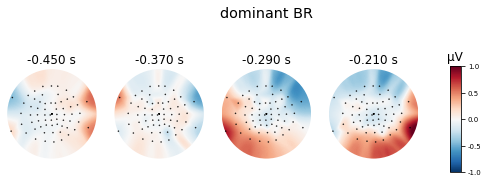

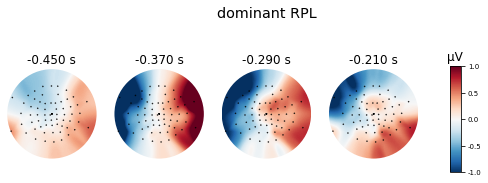

<Figure size 432x288 with 0 Axes>

In [70]:
mne.evoked.plot_evoked_topomap(gave_dominant_BR,times=np.linspace(-0.45,-0.21,4),title='dominant BR',vmin=-1,vmax=1,contours=False)
mne.evoked.plot_evoked_topomap(gave_dominant_RPL,times=np.linspace(-0.45,-0.21,4),title='dominant RPL',vmin=-1,vmax=1,contours=False)
plt.tight_layout()